In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [253]:
path = "/content/drive/MyDrive/데이터분석기초/과제/tem/"
tem11_41 = pd.read_csv(path + "tem11_41.csv", header=0)
tem91_21 = pd.read_csv(path + "tem91_21.csv", header=0)

In [254]:
tem11_41 = tem11_41.drop(columns="지점")
tem91_21 = tem91_21.drop(columns="지점")

In [255]:
tem11_41.head()
#1910년 부터 데이터 가져온 이유는 이동평균 구하기 위해

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,1910.1.1,-5.2,-6.6,0.6
1,1910.1.2,-7.2,-9.4,-4.3
2,1910.1.3,-1.2,-8.2,3.4
3,1910.1.4,3.2,0.4,8.0
4,1910.1.5,2.5,-0.3,7.5


In [256]:
tem11_41.tail()
#위와 같은 이유로 1942년 까지 가져왔다. 

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
11773,1942.3.27,3.4,-1.9,9.0
11774,1942.3.28,9.0,0.1,16.7
11775,1942.3.29,4.6,2.5,11.0
11776,1942.3.30,1.4,-0.7,4.9
11777,1942.3.31,3.5,-2.4,9.0


In [257]:
tem11_41 = tem11_41.set_index("날짜")
tem91_21 = tem91_21.set_index("날짜")

In [258]:
#다음논문 에서 실시한 방법으로 계절 구분 
#이동평균법

In [259]:
tem11_41["총합"] = tem11_41["평균기온(℃)"] + tem11_41["최저기온(℃)"] + tem11_41["최고기온(℃)"]
tem91_21["총합"] = tem91_21["평균기온(℃)"] + tem91_21["최저기온(℃)"] + tem91_21["최고기온(℃)"]
tem11_41.head()

,평균기온(℃),최저기온(℃),최고기온(℃),총합
날짜,,,,
1910.1.1,-5.2,-6.6,0.6,-11.2
1910.1.2,-7.2,-9.4,-4.3,-20.9
1910.1.3,-1.2,-8.2,3.4,-6.0
1910.1.4,3.2,0.4,8.0,11.6
1910.1.5,2.5,-0.3,7.5,9.7


In [260]:
#이동평균 계산
rolling11_41 = tem11_41.rolling(window=7, center=True).mean()
rolling91_21 = tem91_21.rolling(window=7, center=True).mean()
rolling11_41.head()

,평균기온(℃),최저기온(℃),최고기온(℃),총합
날짜,,,,
1910.1.1,NaN,NaN,NaN,NaN
1910.1.2,NaN,NaN,NaN,NaN
1910.1.3,NaN,NaN,NaN,NaN
1910.1.4,-0.171429,-3.500000,4.242857,0.571429
1910.1.5,0.800000,-2.485714,4.971429,3.285714


In [261]:
#1911년 1월 1일~1941년 12월 31일까지 불러오기
#1991년 1월 1일~2021년 12월 31일까지 불러오기 
rolling_11_41 = rolling11_41.loc["1911.1.1":"1941.12.31",]
rolling_91_21 = rolling91_21.loc["1991.1.1":"2021.12.31",]

rolling_11_41.head()

,평균기온(℃),최저기온(℃),최고기온(℃),총합
날짜,,,,
1911.1.1,-5.971429,-10.957143,-1.414286,-18.342857
1911.1.2,-6.100000,-11.085714,-1.528571,-18.714286
1911.1.3,-6.728571,-11.228571,-2.542857,-20.500000
1911.1.4,-6.542857,-11.385714,-2.757143,-20.685714
1911.1.5,-5.457143,-10.242857,-1.542857,-17.242857


In [262]:
rolling_91_21.head()

,평균기온(℃),최저기온(℃),최고기온(℃),총합
날짜,,,,
1991.1.1,-3.557143,-7.428571,1.000000,-9.985714
1991.1.2,-4.385714,-8.114286,-0.057143,-12.557143
1991.1.3,-5.200000,-8.857143,-0.957143,-15.014286
1991.1.4,-6.057143,-9.428571,-2.314286,-17.800000
1991.1.5,-7.214286,-10.371429,-3.328571,-20.914286


In [263]:
rolling_11_41.reset_index(drop=False, inplace=True)
rolling_91_21.reset_index(drop=False, inplace=True)
rolling_11_41

,날짜,평균기온(℃),최저기온(℃),최고기온(℃),총합
0,1911.1.1,-5.971429,-10.957143,-1.414286,-18.342857
1,1911.1.2,-6.100000,-11.085714,-1.528571,-18.714286
2,1911.1.3,-6.728571,-11.228571,-2.542857,-20.500000
3,1911.1.4,-6.542857,-11.385714,-2.757143,-20.685714
4,1911.1.5,-5.457143,-10.242857,-1.542857,-17.242857
...,...,...,...,...,...
11318,1941.12.27,0.085714,-3.971429,3.642857,-0.242857
11319,1941.12.28,-0.457143,-4.685714,3.228571,-1.914286
11320,1941.12.29,-1.900000,-5.614286,1.714286,-5.800000
11321,1941.12.30,-3.971429,-7.742857,-0.242857,-11.957143


In [266]:
rolling_11_41["년도"] = [a.split(".")[0] for a in rolling_11_41["날짜"]]
rolling_91_21["년도"] = [a.split(".")[0] for a in rolling_91_21["날짜"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [267]:
rolling_11_41.head()

,날짜,평균기온(℃),최저기온(℃),최고기온(℃),총합,년도
0,1911.1.1,-5.971429,-10.957143,-1.414286,-18.342857,1911
1,1911.1.2,-6.100000,-11.085714,-1.528571,-18.714286,1911
2,1911.1.3,-6.728571,-11.228571,-2.542857,-20.500000,1911
3,1911.1.4,-6.542857,-11.385714,-2.757143,-20.685714,1911
4,1911.1.5,-5.457143,-10.242857,-1.542857,-17.242857,1911


In [268]:
rolling_91_21.head()

,날짜,평균기온(℃),최저기온(℃),최고기온(℃),총합,년도
0,1991.1.1,-3.557143,-7.428571,1.000000,-9.985714,1991
1,1991.1.2,-4.385714,-8.114286,-0.057143,-12.557143,1991
2,1991.1.3,-5.200000,-8.857143,-0.957143,-15.014286,1991
3,1991.1.4,-6.057143,-9.428571,-2.314286,-17.800000,1991
4,1991.1.5,-7.214286,-10.371429,-3.328571,-20.914286,1991


In [85]:
rolling1911 = rolling_11_41.loc[rolling_11_41[rolling_11_41["년도"] == "1911"].index,]

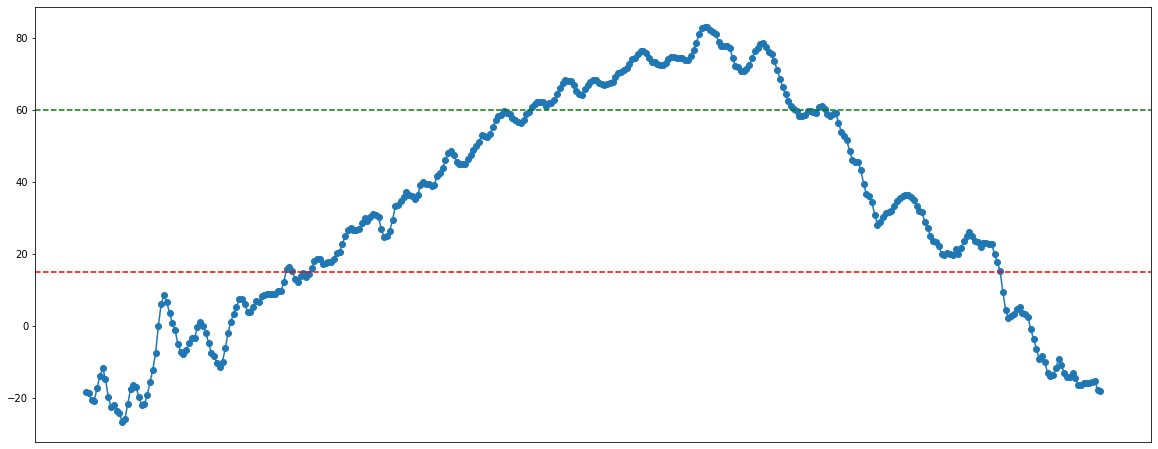

In [95]:
plt.figure(figsize=(20,8))
plt.scatter(rolling1911.iloc[:,0], rolling1911.iloc[:,4])
plt.plot(rolling1911.iloc[:,0], rolling1911.iloc[:,4])
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)
plt.axhline(15, color="red", linestyle="--")
plt.axhline(60, color="green", linestyle="--")

plt.show()

In [204]:
#봄 시작
rolling1911.loc[rolling1911.loc[40:,][rolling1911.loc[40:,"총합"] >= 15].index[0]-1]["날짜"]

'1911.3.13'

In [130]:
#여름 시작
rolling1911.loc[rolling1911[rolling1911["총합"] >= 60].index[0]]["날짜"]

'1911.6.10'

In [132]:
#가을 시작
rolling1911.loc[rolling1911[rolling1911["총합"] >= 60].index[-1]]["날짜"]

'1911.9.23'

In [170]:
#겨울 시작
rolling1911.loc[rolling1911.loc[300:,][rolling1911.loc[300:, "총합"] < 15].index[0]]["날짜"]

'1911.11.26'

In [222]:
rolling1938 = rolling_11_41.loc[rolling_11_41[rolling_11_41["년도"] == "1938"].index,].reset_index()
rolling1938.loc[rolling1938.loc[300:,][rolling1938.loc[300:, "총합"] < 15].index[0]]["날짜"]

'1938.11.9'

In [272]:
year = []
spring = []
summer = []
fall = []
winter = []
for i in np.arange(1911, 1942, 1):
    data = rolling_11_41.loc[rolling_11_41[rolling_11_41["년도"] == str(i)].index,].reset_index()
    year.append(str(i))
    spring.append(data.loc[data.loc[40:,][data.loc[40:,"총합"] >= 15].index[0]-1]["날짜"]) #봄 시작일 찾기
    summer.append(data.loc[data[data["총합"] >= 60].index[0]]["날짜"]) #여름 시작일 찾기
    fall.append(data.loc[data[data["총합"] >= 60].index[-1]]["날짜"])  #가을 시작일 찾기
    winter.append(data.loc[data.loc[300:,][data.loc[300:,"총합"] < 15].index[0]]["날짜"])  #겨울 시작일 찾기

df11_41 = pd.DataFrame({"year":year,
                        "spring":spring,
                        "summer":summer,
                        "fall":fall,
                        "winter":winter})
df11_41

,year,spring,summer,fall,winter
0,1911,1911.3.13,1911.6.10,1911.9.23,1911.11.26
1,1912,1912.2.23,1912.6.4,1912.9.7,1912.11.5
2,1913,1913.3.15,1913.6.2,1913.9.30,1913.11.11
3,1914,1914.2.17,1914.6.13,1914.9.15,1914.11.18
4,1915,1915.3.31,1915.6.7,1915.10.4,1915.11.16
5,1916,1916.4.5,1916.6.14,1916.9.21,1916.11.14
6,1917,1917.3.18,1917.6.8,1917.9.20,1917.11.5
7,1918,1918.3.15,1918.6.13,1918.9.12,1918.11.8
8,1919,1919.2.28,1919.6.1,1919.9.12,1919.11.18
9,1920,1920.3.15,1920.6.3,1920.9.15,1920.11.27


In [269]:
year = []
spring = []
summer = []
fall = []
winter = []
for i in np.arange(1991, 2022, 1):
    data = rolling_91_21.loc[rolling_91_21[rolling_91_21["년도"] == str(i)].index,].reset_index()
    year.append(str(i))
    spring.append(data.loc[data.loc[40:,][data.loc[40:,"총합"] >= 15].index[0]-1]["날짜"])
    summer.append(data.loc[data[data["총합"] >= 60].index[0]]["날짜"])
    fall.append(data.loc[data[data["총합"] >= 60].index[-1]]["날짜"])
    winter.append(data.loc[data.loc[300:,][data.loc[300:,"총합"] < 15].index[0]]["날짜"])

df91_21 = pd.DataFrame({"year":year,
                        "spring":spring,
                        "summer":summer,
                        "fall":fall,
                        "winter":winter})
df91_21

,year,spring,summer,fall,winter
0,1991,1991.3.17,1991.5.20,1991.9.21,1991.11.26
1,1992,1992.2.25,1992.5.30,1992.9.22,1992.11.23
2,1993,1993.3.5,1993.5.27,1993.9.23,1993.11.20
3,1994,1994.3.4,1994.6.1,1994.9.20,1994.11.30
4,1995,1995.3.4,1995.6.6,1995.9.21,1995.11.21
5,1996,1996.3.13,1996.5.25,1996.9.28,1996.11.15
6,1997,1997.2.24,1997.6.6,1997.9.14,1997.11.29
7,1998,1998.2.16,1998.5.19,1998.10.11,1998.11.18
8,1999,1999.2.28,1999.6.1,1999.9.28,1999.11.25
9,2000,2000.3.12,2000.5.23,2000.9.28,2000.11.10


In [273]:
df91_21.to_excel(path + "df91_21.xls")
df11_41.to_excel(path + "df11_41.xls")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise 